In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
from scipy.stats import ks_2samp

### first tryin to get a handle on the data

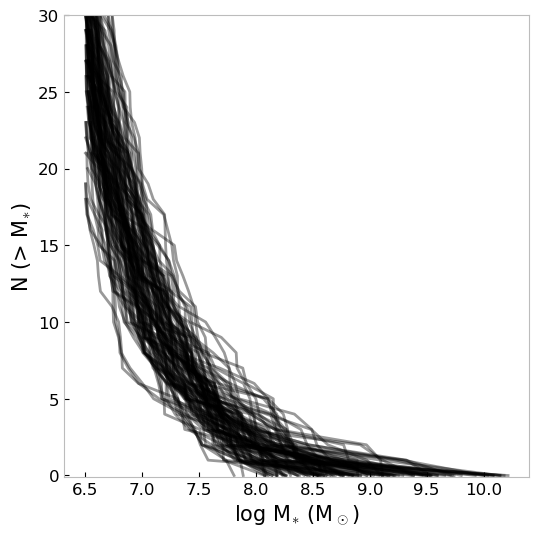

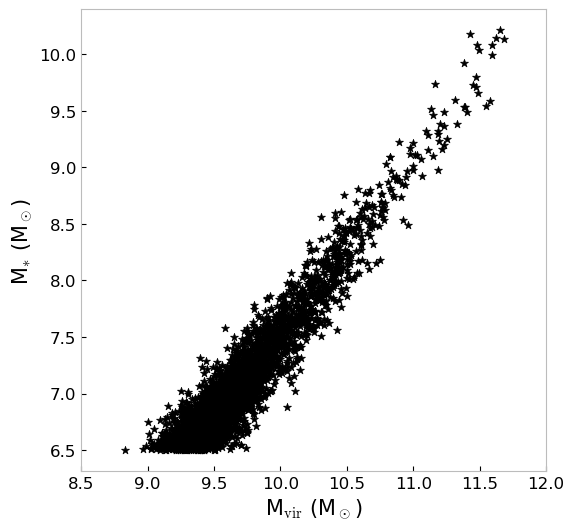

In [4]:
fid_theta = np.array([10.5, 1.5, 0.2, 0, 0, 0])
min_mass = 6.5

mock = jsm_models.init_data(fid_theta, "../../../SatGen/mcmc/new_stats/tot/mock_2/mock_data.npy")
mock.get_stats(min_mass=min_mass)
mock.plot_SMF()
mock.plot_SHMR()

### now the models

In [9]:
modelz = jsm_models.load_models("../../../data/MW-analog/meta_data_psi3/", Nsamples=1)

test_theta = [10.5, 1.5, 0.2, 0, 0, 0]
modelz.get_stats(fid_theta, 6.5, jsm_SHMR.general)

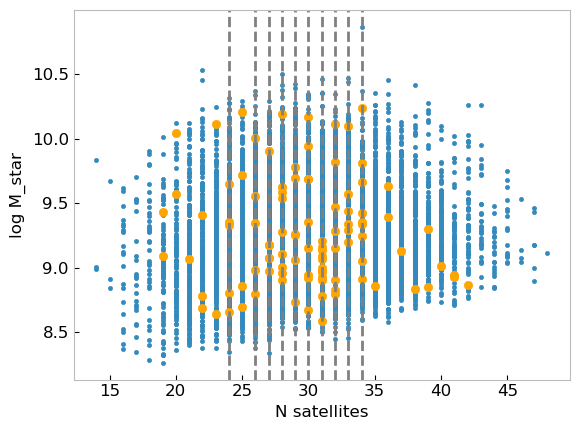

In [10]:
for i, val in enumerate(mock.stat.Nsat_unibin):
    if mock.stat.Nsat_perbin[i] > 4:
        plt.axvline(val, color="grey", ls="--")
plt.scatter(modelz.stat.Nsat_perhost, modelz.stat.totmass, marker=".")
plt.scatter(mock.stat.Nsat_perhost, mock.stat.totmass, marker="o", color="orange")

plt.xlabel("N satellites")
plt.ylabel("log M_star")
plt.show()

In [17]:
def lnlike(theta):
    modelz.get_stats(theta, 6.5, jsm_SHMR.general)
    lnL_Pnsat = jsm_stats.lnL_PNsat(mock, modelz)
    lnL_KS_max = jsm_stats.lnL_KS_max(mock, modelz)
    lnL_KS_tot = jsm_stats.lnL_KS_tot(mock, modelz)
    return np.array([lnL_Pnsat, lnL_KS_max, lnL_KS_tot])

In [18]:
Niter = 500
empty = np.zeros(shape=(Niter, 3))

for j in range(Niter):
    empty[j] = lnlike(fid_theta)

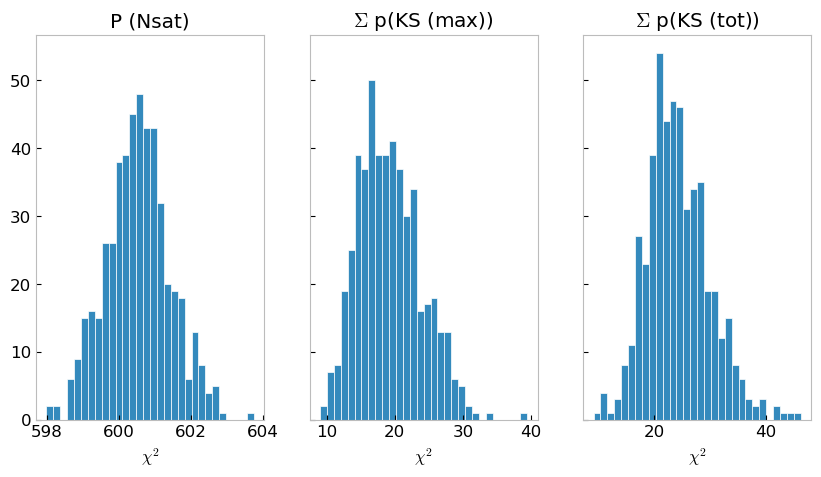

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(10,5), sharey=True)
axs[0].set_title("P (Nsat)")
axs[0].hist(-2*empty[:,0], bins=30, edgecolor="white")

axs[1].set_title("$\Sigma$ p(KS (max))")
axs[1].hist(-2*empty[:,1], bins=30, edgecolor="white")

axs[2].set_title("$\Sigma$ p(KS (tot))")
axs[2].hist(-2*empty[:,2], bins=30, edgecolor="white")

axs[0].set_xlabel("$\chi^2$")
axs[1].set_xlabel("$\chi^2$")
axs[2].set_xlabel("$\chi^2$")

plt.show()

In [ ]:
# Neff_cut = mock.stat.Nsat_perbin > 4

# mask_data = np.where(Neff_cut)[0].tolist()

# mock_split = list(map(mock.stat.Ms_max_split.__getitem__, mask_data))

# mask_model = mock.stat.Nsat_unibin[Neff_cut].tolist()

# instance_split = list(map(instance.stat.Ms_max_split.__getitem__, mask_model)) # this is the IndexError

In [ ]:
# p_vals = []

# for i, val in enumerate(N_bin_D):
#     print(f"Nbin: {val}")

#     assert val == N_bin_M[val-min(N_bin_M)]

#     data = Msmax_Nsplit_D[i]
#     model = Msmax_Nsplit_M[val-min(N_bin_M)]

#     Ne = (len(data) * len(model))/(len(data) + len(model))
#     if Ne > 4.0:
#         D_stat, p_val = ks_2samp(data, model)

#         ind_D, cdf_D = jsm_stats.ecdf_plot(data)
#         ind_M, cdf_M = jsm_stats.ecdf_plot(model)

#         lnL = np.log(p_val)
#         chi2 = -2*lnL

#         plt.figure(figsize=(6,6))
#         plt.title(f"D (KS)={D_stat:.4f}, Ne = {Ne:.2f} \n p = {p_val:.5f}, lnL = {lnL:.4f}")
#         plt.plot(ind_D, cdf_D, color="black")
#         plt.plot(ind_M, cdf_M, color="grey")
#         plt.show()

#         p_vals.append(p_val)
# #     else:
# #         print("could not compute the KS test with provided data!")
# #         p_vals.append(np.nan)


In [ ]:
# def measure_lnL(Msmax_Nsplit_D, Msmax_Nsplit_M):
#     lnLs = []
#     for i, val in enumerate(N_bin_D):
#         data = Msmax_Nsplit_D[i]
#         model = Msmax_Nsplit_M[val-min(N_bin_M)]
#         Ne = (len(data) * len(model))/(len(data) + len(model))
#         if Ne > 4.0:
#             D_stat, p_val = ks_2samp(data, model)
#             lnLs.append(np.log(p_val))
#         else:
#             lnLs.append(np.nan)
#     return np.nansum(lnLs)

In [ ]:
# N = 300
# empty = np.zeros(shape=(N))

# for i in range(N):
#     instance = forward(fid_theta)

#     N_bin_M, counts_M = np.unique(instance.stat.satfreq, return_counts=True)
#     indexing_M = np.insert(np.cumsum(counts_M),0,0)
#     max_masses_M = instance.stat.Msmax[np.argsort(instance.stat.satfreq)]
#     Msmax_Nsplit_M = np.split(max_masses_M, indexing_M)[1:-1]
    
#     empty[i] = measure_lnL(Msmax_Nsplit_D, Msmax_Nsplit_M)

In [ ]:
# plt.title("1000 iterations of $\\theta = \\theta_{fid}$")
# plt.hist(empty, bins=20, edgecolor="white")
# plt.xlabel("lnL = $\Sigma\ \log (p_{KS})$")
# plt.show()

In [ ]:
# def KS_visualize(model, data):

#     D_stat, p_val =  ks_2samp(model, data)
#     data_sorted = np.sort(data)
#     ecdf_data = jsm_stats.ecdf_nan(data_sorted)

#     model_sorted = np.sort(model)
#     ecdf_model = jsm_stats.ecdf_nan(model_sorted)

#     lnL = np.log(p_val)
#     chi2 = -2*lnL

#     plt.figure(figsize=(6,6))
#     plt.title(f"D (KS)={D_stat}, p = {p_val} \n lnL = {lnL:.4f}, $\chi^2$={chi2:.4f}")
#     plt.plot(data_sorted, ecdf_data, marker="+", color="black")
#     plt.plot(model_sorted, ecdf_model, color="grey")
#     plt.xlabel("M$_*$ ($\mathrm{log\ M_{\odot}}$)", fontsize=15)
#     plt.ylabel("CDF", fontsize=15)
#     plt.show()

#     return p_val

In [ ]:
# N_sats_in_each = np.sum(~np.isnan(model), axis=0)

In [ ]:
# Ne = (N_sats_in_each * N_sats_in_each_data)/(N_sats_in_each + N_sats_in_each_data)

In [ ]:
# P_vals=[]
# for i in range(data.shape[1]):
#     print("N (> M) = ", data.shape[1] - i -1)
#     print("Ne = ", Ne[i])
#     p_val =  KS_visualize(model[:, i], data[:, i])
#     P_vals.append(p_val)

In [ ]:
# lnL_total = np.sum(np.log(np.array(P_vals)))
# fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,8))
# ax[0].set_title(f"total $\chi^2 =$ {-2*lnL_total:.5}")
# ax[0].plot(countz, -2*np.log(np.array(P_vals)), marker="o", color="black")
# ax[0].set_xlabel("N (>M)")
# ax[0].set_ylabel("$\chi^2$")

# ax[1].plot(countz, Ne, marker="o", color="black")
# ax[1].set_ylabel("Ne")
# ax[1].axhline(4, ls="--", color="red")
# plt.show()

In [ ]:
# def KS_test(model, data):
#     D_stat, p_val =  ks_2samp(model, data)
#     lnL = np.log(p_val)
#     #chi2 = -2*lnL
#     return lnL

In [ ]:
# N = 500
# empty = np.zeros(shape=(N,data.shape[1]))

# for j in range(N):
#     lgMs_perf = forward(test_theta)
#     model = boolean_indexing(process_array(lgMs_perf))
#     model = model[:, -data.shape[1]:]
#     for i in range(data.shape[1]):
#         empty[j, i] = KS_test(model[:, i], data[:, i])

In [ ]:
# for i, val in enumerate(empty.T):
#     print("N (>M)",9-i)
#     plt.hist(-2*val, bins=20, edgecolor="white")
#     plt.show()

In [ ]:
# plt.hist(-2*np.sum(empty, axis=1), bins=20, edgecolor="white")
# plt.title("total $\chi^2$")
# plt.show()


In [ ]:
# for i, val in enumerate(masses[0:1000]):
#     plt.plot(val, counts[i], color="grey", alpha=0.1, zorder=0)

# plt.scatter(X_vec_M[0, :], countz, color="red", marker=">")
# plt.scatter(X_vec_M[1, :], countz, color="red", marker="+")
# plt.scatter(X_vec_M[2, :], countz, color="red", marker="<")

# plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
# plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
# plt.show()

In [ ]:
# countz = np.arange(data.shape[1]-1, -1, -1)

In [ ]:
# plt.title()
# plt.fill_betweenx(countz, X_vec_M[0, -X_vec.shape[1]:], X_vec_M[2, -X_vec.shape[1]:], color='grey', alpha=0.3, label="model")

# plt.plot(X_vec[0, :], countz, color="black", marker=">")
# plt.scatter(X_vec[1, :], countz, color="black", marker="+", label="data")
# plt.plot(X_vec[2, :], countz, color="black", marker="<")

# plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
# plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
# plt.legend()
# plt.show()

In [ ]:
# Y_model = X_vec_M[:, -X_vec.shape[1]:]

# Y_data = X_vec

# covariance = np.cov(Y_data, rowvar=1)

# inv_covar = np.linalg.inv(covariance)

# diff = Y_model - Y_data

# chisquare = np.sum(diff.transpose().dot(inv_covar).dot(diff))

In [ ]:
# def lnlike(theta):
#     model = MODEL(theta)
#     X = model - data.D
#     X_vec = np.expand_dims(X, axis=1)
#     chisquare = X_vec.transpose().dot(data.inv_covar).dot(X_vec)
#     return -1/2*np.sum(chisquare)

# self.sampave = np.average(self.D_mat,axis=0)
# self.covariance = np.cov(self.D_mat, rowvar=False)
# self.sampstd = np.sqrt(np.diag(self.covariance))
# self.inv_covar = np.linalg.inv(self.covariance)